In [118]:

import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [275]:
train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
df = train.append(test).reset_index()

In [120]:
import sys
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe.head()

for col in binary_cols:
    df = label_encoder(df, col)

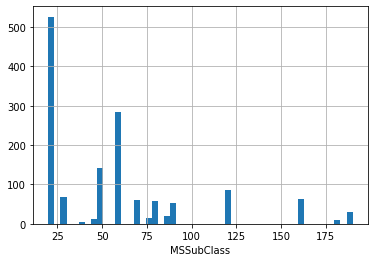

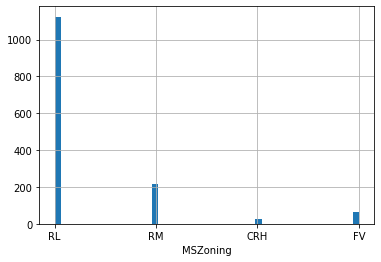

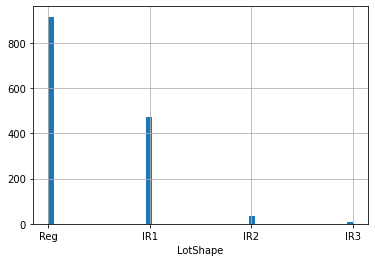

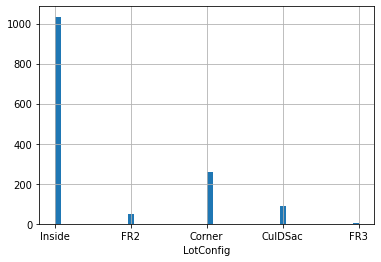

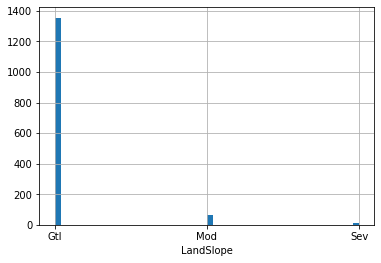

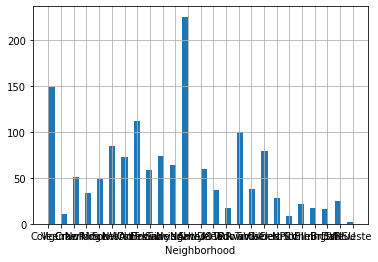

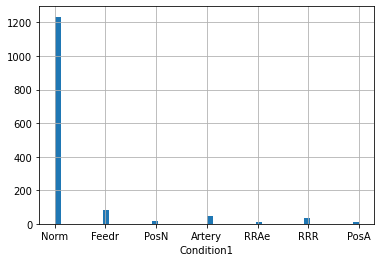

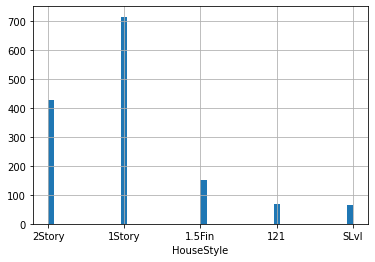

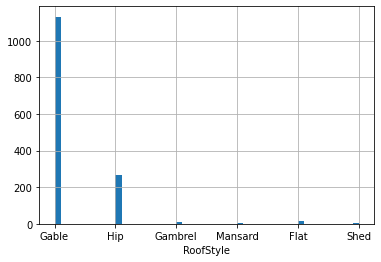

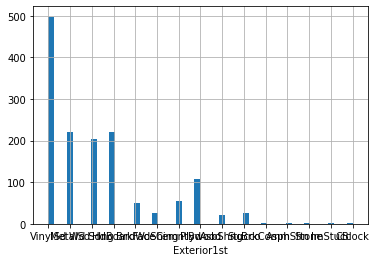

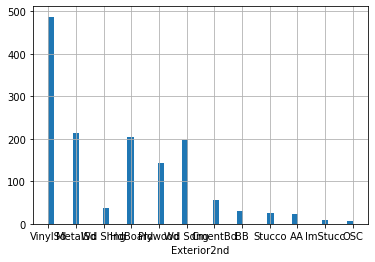

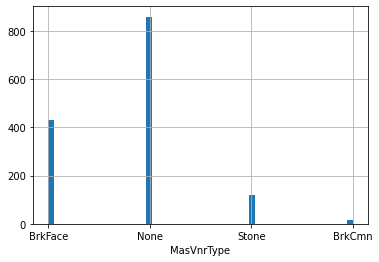

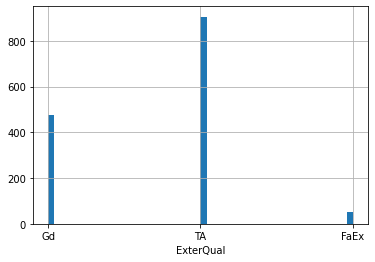

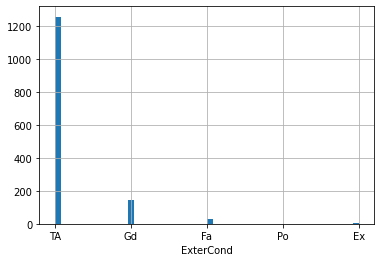

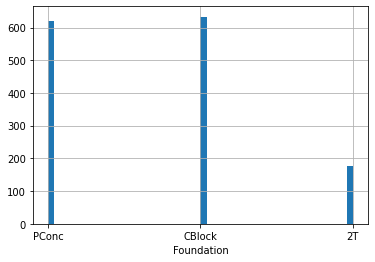

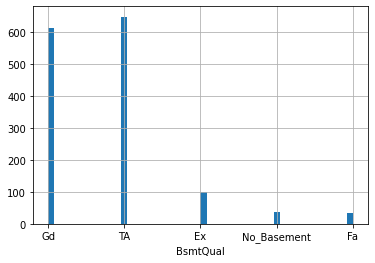

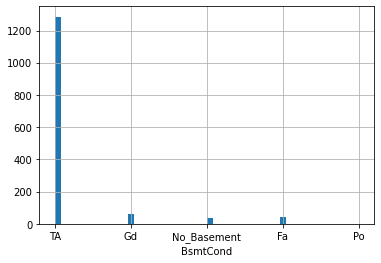

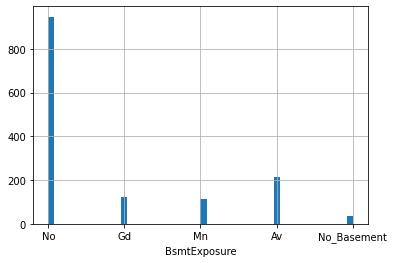

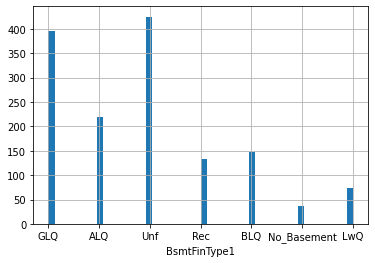

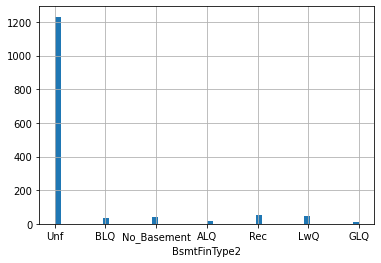

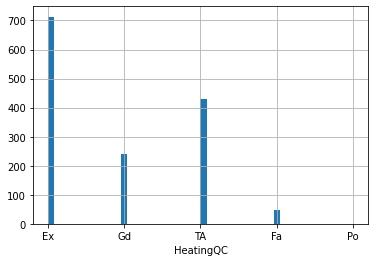

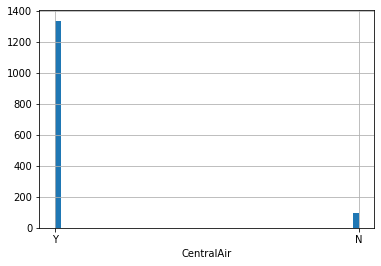

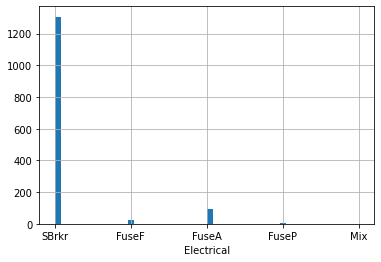

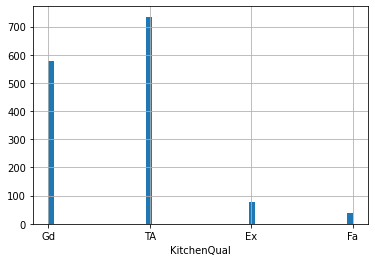

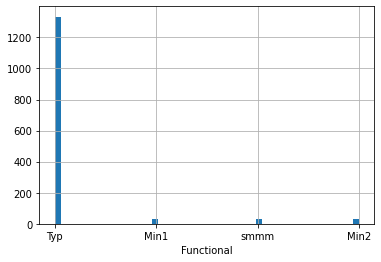

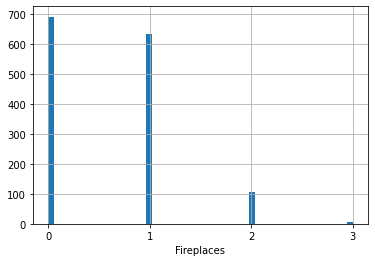

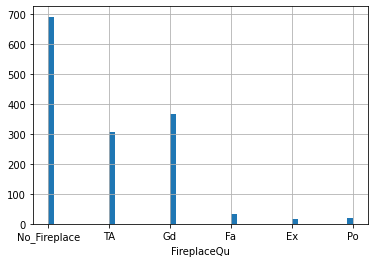

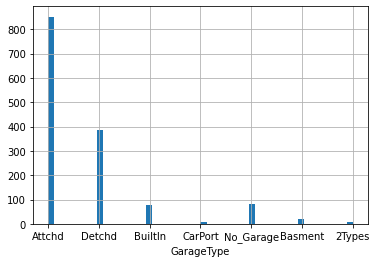

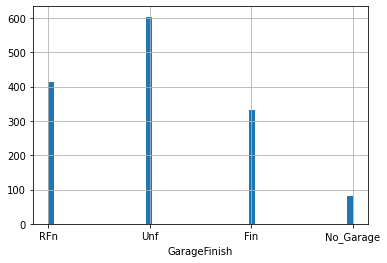

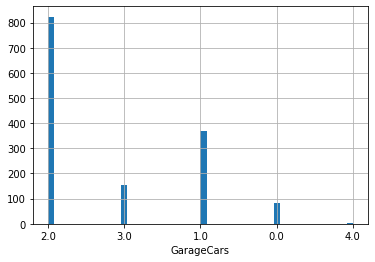

In [ ]:
for col in cat_cols:
    df[col].hist(bins=50)
    plt.xlabel(col)
    plt.show()

<AxesSubplot:>

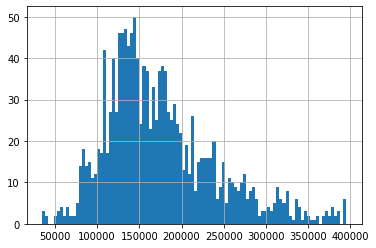

In [263]:
df["SalePrice"].hist(bins=100)

In [276]:
## OUTLİER
df = df[df['SalePrice'] < 400000.0]

In [277]:
### NEW FEATURES
df["Floorcross_tersr"]=(df["2ndFlrSF"] + df["1stFlrSF"]) / df["1stFlrSF"]
df["Total_Floor"]=df["1stFlrSF"] + df["2ndFlrSF"]
df["_Floor_cross"] =df["1stFlrSF"] * (df["1stFlrSF"] + df["2ndFlrSF"])
df["Zemin_Alan_Kullanımı"]=(df["GrLivArea"] + df["1stFlrSF"]*df["1stFlrSF"])/df["1stFlrSF"]
df["Alana_düşen_Mutfak"]=df["KitchenAbvGr"] / df["1stFlrSF"]
df["bodrum_banyo_per"]=(df["BsmtFullBath"] + (df["TotalBsmtSF"])/df["TotalBsmtSF"])
df["GrLivArea"] = np.log10(df["GrLivArea"])


In [278]:
df["mean_1stFlrSF_GrLivArea"] = df[['1stFlrSF', 'GrLivArea']].mean(axis=1)
df['std_1stFlrSF_GrLivArea'] = df[['1stFlrSF', 'GrLivArea']].std(axis=1)
df['BsmtQual'].fillna('No_Basement', inplace=True)
df['BsmtCond'].fillna('No_Basement', inplace=True)
df['BsmtExposure'].fillna('No_Basement', inplace=True)
df['BsmtFinType1'].fillna('No_Basement', inplace=True)
df['BsmtFinType2'].fillna('No_Basement', inplace=True)
df['FireplaceQu'].fillna('No_Fireplace', inplace=True)
df['GarageType'].fillna('No_Garage', inplace=True)
df['GarageFinish'].fillna('No_Garage', inplace=True)
df['GarageQual'].fillna('No_Garage', inplace=True)
df['GarageCond'].fillna('No_Garage', inplace=True)
df['PoolQC'].fillna('No_Garage', inplace=True)
df["sold_build"] = (df["YrSold"]/df["YearBuilt"])
df["Lot_divide"] = (df["LotArea"] / df["LotFrontage"]) 
df['GarageYrBlt'].fillna(df["GarageYrBlt"].median(), inplace=True)

In [279]:
### NEW VARIABLES

df["Functional"] = np.where(df.Functional.isin(["Sev", "Maj2", "Maj1","Mod"]), "smmm", df["Functional"])
df["BldgType"] = np.where(df.BldgType.isin(["2fmCon", "Twnhs"]), "2T", df["BldgType"])
df["HouseStyle"] = np.where(df.HouseStyle.isin(["2.5Fin", "1.5Unf" ,"2.5Unf","SFoyer"]), "121", df["HouseStyle"])
df["ExterQual"] = np.where(df.ExterQual.isin(["Fa", "Ex"]), "FaEx", df["ExterQual"])
df["Foundation"] = np.where(df.Foundation.isin(["Wood", "Stone","Slab","BrkTil"]), "2T", df["Foundation"])
df["MSZoning"] = np.where(df.MSZoning.isin(["C (all)", "RH"]), "CRH", df["MSZoning"])
df["Fireplaces"] = np.where(df.Fireplaces.isin(["4", "3"]), "43", df["Fireplaces"])
df["GarageCars"] = np.where(df.GarageCars.isin(["4.000", "5.000"]), "45", df["GarageCars"])
df["Condition1"] = np.where(df.Condition1.isin(["RRNn", "RRNe","RRAn"]), "RRR", df["Condition1"])
df["Exterior2nd"] = np.where(df.Exterior2nd.isin(["AsbShng", "AsphShn"]), "AA", df["Exterior2nd"])
df["Exterior2nd"] = np.where(df.Exterior2nd.isin(["Brk Cmn", "BrkFace"]), "BB", df["Exterior2nd"])
df["Exterior2nd"] = np.where(df.Exterior2nd.isin(["Other", "Stone","CBlock"]), "OSC", df["Exterior2nd"])

In [280]:
####  DROPPING COLUMNS
df.drop("PoolArea", axis=1, inplace=True)
drop_list = ["LandContour", "BldgType", "Heating","Street","Utilities","Condition2", "RoofMatl", "index", "MiscFeature","Fence","PoolQC","GarageCond","Alley", "MiscVal", "3SsnPorch","LowQualFinSF"]
df.drop(drop_list, axis=1, inplace=True)

In [191]:
### DATE CONVERT


df.YrSold=df.YrSold.astype("int32")
df.YearBuilt=df.YearBuilt.astype("int32")
df.YearRemodAdd=df.YearRemodAdd.astype("int32")

df['Date_sold']=df['YrSold'].astype(str) + df['MoSold'].astype(str).str.zfill(2)
df['Date_sold'] = pd.to_datetime(df['Date_sold'], format='%Y%m')


df["GarageYrBlt"] = pd.to_datetime(df.GarageYrBlt, format = '%Y')
df.YearBuilt = pd.to_datetime (df.YearBuilt , format = '%Y')
df.YearRemodAdd = pd.to_datetime (df.YearRemodAdd, format= '%Y' )


df.drop("YrSold", axis=1, inplace=True)
df.drop("MoSold", axis=1, inplace=True)

year_=["YearRemodAdd","YearBuilt","GarageYrBlt","Date_sold" ]

In [193]:
import datetime as dt
for col in year_:
    df[col] = pd.to_datetime(df[col])
    df[col]= df[col].map(dt.datetime.toordinal)

In [196]:
df.allhead()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SaleType,SaleCondition,SalePrice,Floorcross_tersr,Total_Floor,_Floor_cross,Zemin_Alan_Kullanımı,Alana_düşen_Mutfak,bodrum_banyo_per,mean_1stFlrSF_GrLivArea,std_1stFlrSF_GrLivArea,sold_build,Lot_divide,Date_sold
0,1,60,RL,65.000,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,731216,731216,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000,Unf,0.000,150.000,2.932,GasA,Ex,Y,SBrkr,856,854,0,3.233,1.000,0.000,2,1,3,1,Gd,8,Typ,0,No_Fireplace,Attchd,731216,RFn,2.0,548.000,TA,Y,0,61,0,0,0,WD,Normal,208500.000,1.998,1710,1463760,857.998,0.001,2.000,429.616,602.997,1.002,130.000,733073
1,2,20,RL,80.000,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,721354,721354,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000,Unf,0.000,284.000,3.101,GasA,Ex,Y,SBrkr,1262,0,0,3.101,0.000,1.000,2,0,3,1,TA,6,Typ,1,TA,Attchd,721354,RFn,2.0,460.000,TA,Y,298,0,0,0,0,WD,Normal,181500.000,1.000,1262,1592644,1263.000,0.001,1.000,632.551,890.176,1.016,120.000,732797
2,3,60,RL,68.000,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,730486,730851,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000,Unf,0.000,434.000,2.964,GasA,Ex,Y,SBrkr,920,866,0,3.252,1.000,0.000,2,1,3,1,Gd,6,Typ,1,TA,Attchd,730486,RFn,2.0,608.000,TA,Y,0,42,0,0,0,WD,Normal,223500.000,1.941,1786,1643120,921.941,0.001,2.000,461.626,648.239,1.003,165.441,733286
3,4,70,RL,60.000,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,699074,719163,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,2T,TA,Gd,No,ALQ,216.000,Unf,0.000,540.000,2.879,GasA,Gd,Y,SBrkr,961,756,0,3.235,1.000,0.000,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,729390,Unf,3.0,642.000,TA,Y,0,35,272,0,0,WD,Abnorml,140000.000,1.787,1717,1650037,962.787,0.001,2.000,482.117,677.242,1.048,159.167,732343
4,5,60,RL,84.000,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,730120,730120,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000,Unf,0.000,490.000,3.059,GasA,Ex,Y,SBrkr,1145,1053,0,3.342,1.000,0.000,2,1,4,1,Gd,9,Typ,1,TA,Attchd,730120,RFn,3.0,836.000,TA,Y,192,84,0,0,0,WD,Normal,250000.000,1.920,2198,2516710,1146.920,0.001,2.000,574.171,807.274,1.004,169.762,733377


In [150]:
df["MSSubClass"]

AttributeError: 'Series' object has no attribute 'info'

In [127]:
########## Fuctional

#aggregations_FC = { "GarageCars" : ["min", "max"],
   #                     "GarageArea" : ["mean"],
    #                 "EnclosedPorch": ["mean"],
     #                "1stFlrSF" : ["mean", "min", "std", "max"],
      #               "KitchenAbvGr": ["min", "max"],
       #             "BedroomAbvGr": ["mean", "std", "var"],
        #             "TotRmsAbvGrd": ["mean"]
         #              }
#Functional = df.groupby('Functional').agg(aggregations_FC)
 
#Functional.columns = pd.Index(['Functional' + e[0] + "_" + e[1].upper() for e in Functional.columns.tolist()])

#df.drop(["GarageCars","GarageArea","EnclosedPorch","1stFlrSF","KitchenAbvGr", "BedroomAbvGr","TotRmsAbvGrd"],axis=1, inplace=True)


#df = df.join(Functional, how='left', on="Functional")   



######## MSZoning

aggregations_MS = {"LotFrontage":["sum","mean"],
                    "LotArea": ["min", "mean","sum","max"],
                    "Street":["nunique", "size"],
                     "LandContour": ["nunique"],
                    "LandSlope": ["nunique"],
                      }
MSZoning = df.groupby('MSZoning').agg(aggregations_MS)

MSZoning.columns = pd.Index(['MSZoning' + e[0] + "_" + e[1].upper() for e in MSZoning.columns.tolist()])
 
df.drop(["LotFrontage","MiscVal", "LotArea", "Street", "LandContour", "LandSlope" ],axis=1, inplace=True)
    
df = df.join(MSZoning, how='left', on='MSZoning')   




####### MSSubClass



aggregations_BC = { "WoodDeckSF": ["mean","sum","max"],
                    "OpenPorchSF":["min", "mean","sum","max"],
                    "TotalBsmtSF": ["mean","sum","max"],
                     "GrLivArea": ["min", "max", "size"],
                      "Build" : ["min","max"],
                       "2ndFlrSF" : ["var", "std", "mean","min"]
                       }
MSSubClass = df.groupby('MSSubClass').agg(aggregations_BC)

MSSubClass.columns = pd.Index(['MSSubClass' + e[0] + "_" + e[1].upper() for e in MSSubClass.columns.tolist()])
    
df.drop(["2ndFlrSF","Build", "WoodDeckSF", "OpenPorchSF", "GrLivArea",  "TotalBsmtSF" ],axis=1, inplace=True)

df = df.join(MSSubClass, how='left', on='MSSubClass')   




df.drop("Std_Build", axis=1, inplace=True)

KeyError: "Column(s) ['Build'] do not exist"

In [282]:
def grab_col_names(dataframe, cat_th=20, car_th=100, num_th = 118):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O" and col not in "SalePrice" and col not in "Id"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, cat_but_car, num_cols, num_but_cat


cat_cols, cat_but_car, num_cols, num_but_cat = grab_col_names(df)

Observations: 1432
Variables: 75
cat_cols: 46
num_cols: 27
cat_but_car: 0
num_but_cat: 12


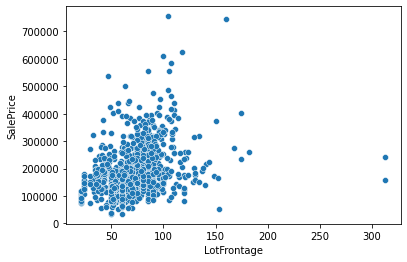

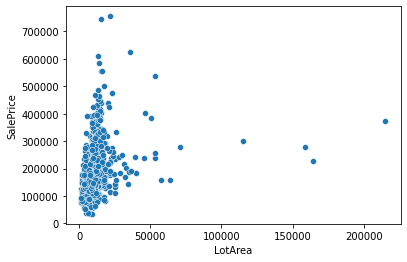

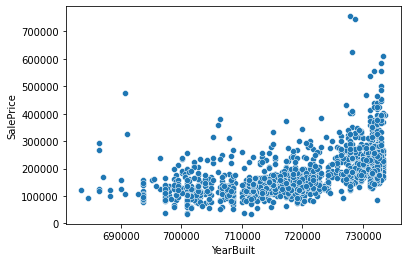

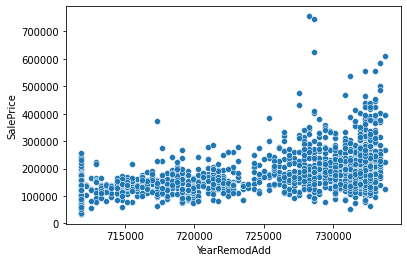

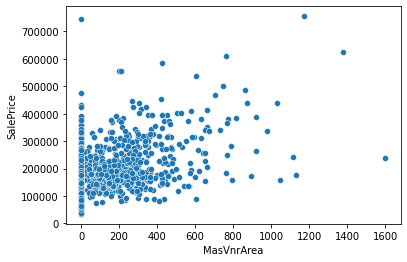

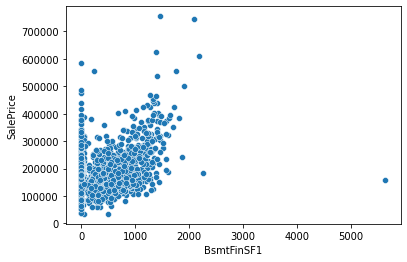

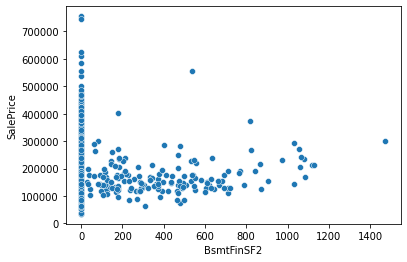

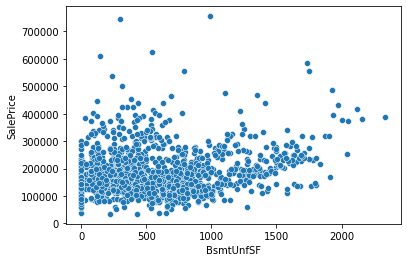

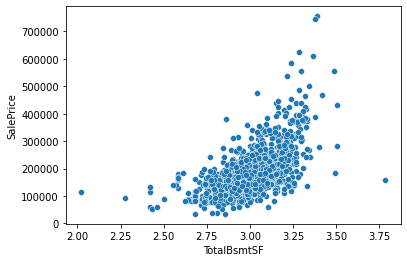

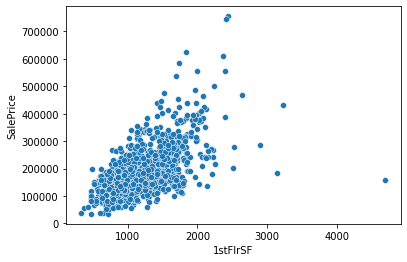

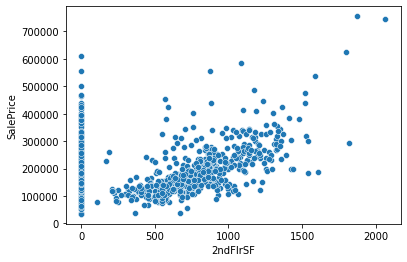

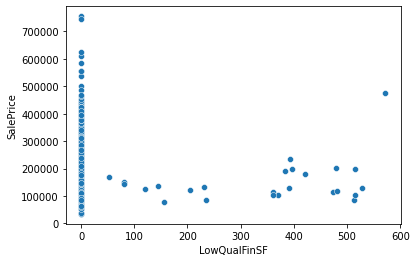

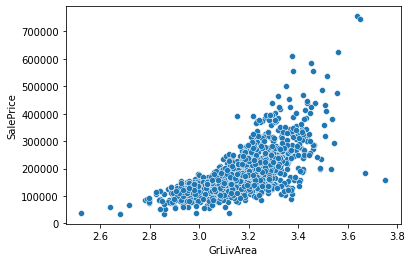

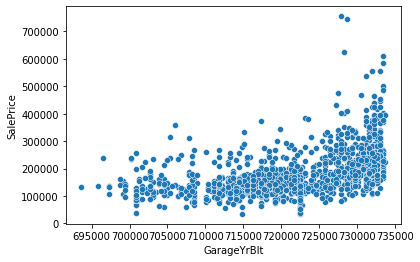

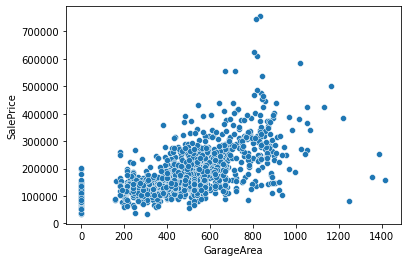

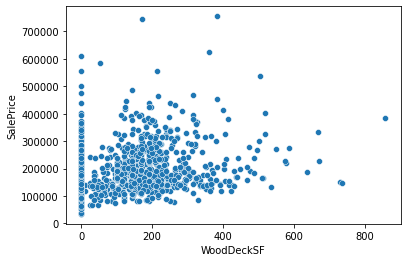

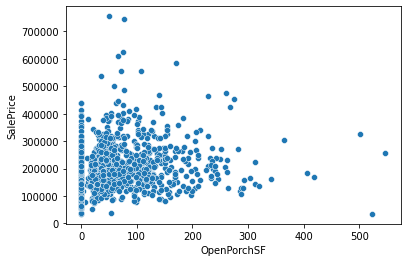

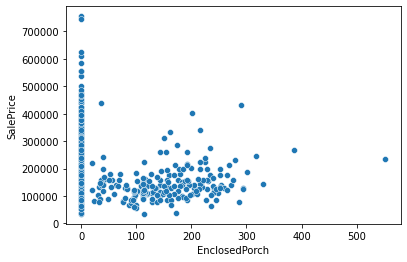

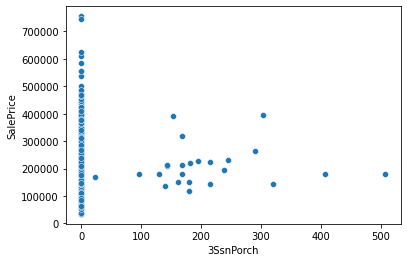

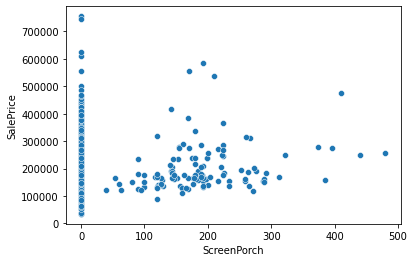

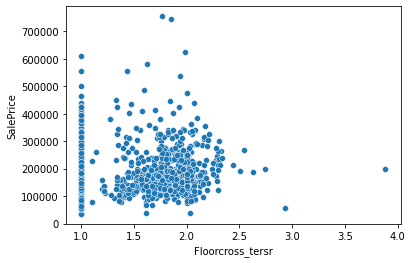

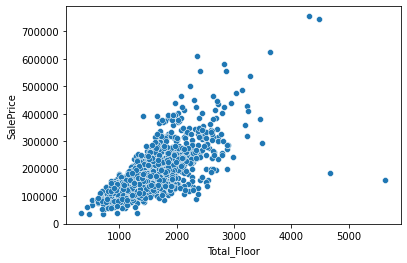

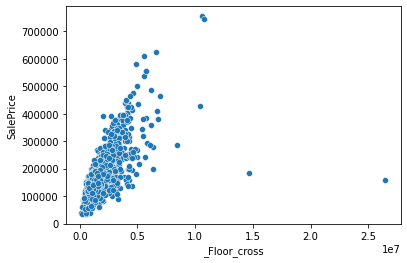

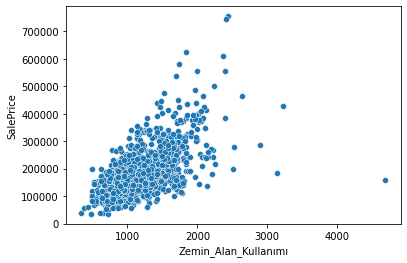

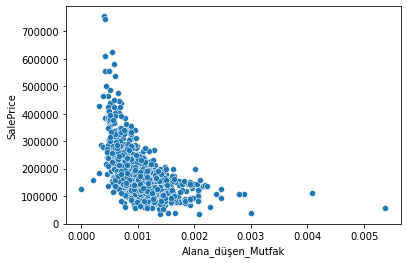

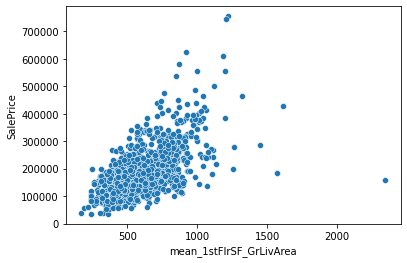

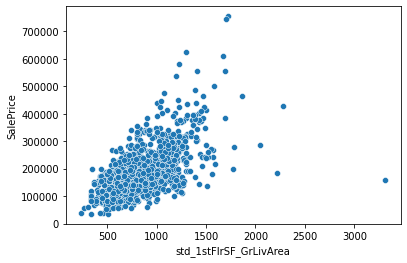

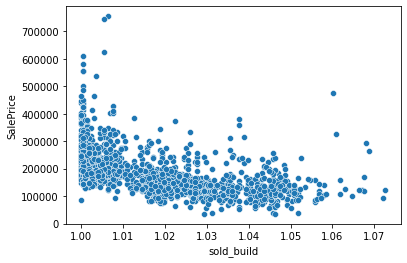

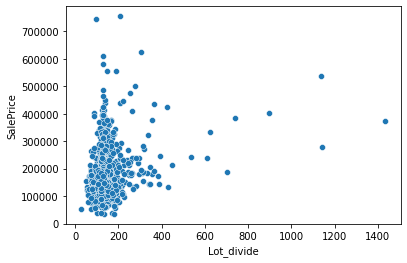

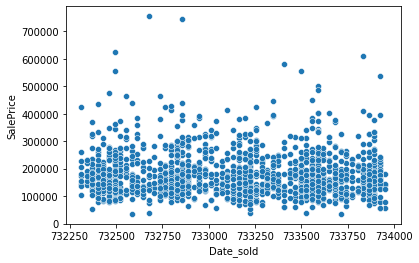

In [195]:
for col in num_cols:
    sns.scatterplot(df[col], df["SalePrice"])
    plt.show()

In [175]:
df.isnull().sum()

Id                          0
LotFrontage               486
LotArea                     0
OverallQual                 0
OverallCond                 0
YearBuilt                   0
YearRemodAdd                0
MasVnrArea                 23
BsmtFinSF1                  1
BsmtFinSF2                  1
BsmtUnfSF                   1
TotalBsmtSF                 1
1stFlrSF                    0
2ndFlrSF                    0
LowQualFinSF                0
GrLivArea                   0
BsmtFullBath                2
BsmtHalfBath                2
FullBath                    0
HalfBath                    0
BedroomAbvGr                0
KitchenAbvGr                0
TotRmsAbvGrd                0
GarageYrBlt               159
GarageArea                  1
WoodDeckSF                  0
OpenPorchSF                 0
EnclosedPorch               0
3SsnPorch                   0
ScreenPorch                 0
SalePrice                1459
Floorcross_tersr            0
Total_Floor                 0
_Floor_cro

In [162]:
df["Date_sold"] = pd.to_datetime(df["Date_sold"])  
df["YearRemodAdd"] = pd.to_datetime(df["YearRemodAdd"])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
df[num_cols] = scaler.fit_transform(df[num_cols])
print(scaled)

In [ ]:
na_list = [col for col in df.columns if df[col].isnull().sum() >0 and col not in "SalePrice"]
for col in na_list:
    df.dropna(subset=[col], how = "all", inplace=True)

In [270]:
def one_hot_encoder(df, drop_first=True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, drop_first=drop_first)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

df, new_columns = one_hot_encoder(df)

In [281]:
df["MSSubClass"] = df["MSSubClass"].astype("O")
    

In [271]:
train_df = df[df['SalePrice'].notnull()]
test_df = df[df['SalePrice'].isnull()]

In [200]:
train_df.dropna(inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [272]:
X =train_df.drop(["SalePrice", "Id"], axis=1)
y = np.log1p(train_df['SalePrice'])

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

In [131]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>)

In [274]:
models = [("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor()),
          ("CatBoost", CatBoostRegressor(verbose=False))]

for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 0.1316 (XGBoost) 
RMSE: 0.1277 (LightGBM) 
RMSE: 0.1156 (CatBoost) 


In [255]:


catboost = CatBoostRegressor(verbose=False)

rmse = np.mean(np.sqrt(-cross_val_score(catboost,
                                        X, y, cv=10, scoring="neg_mean_squared_error")))
rmse

0.11918133343387678

In [222]:
def display_importances(X):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(8, 10))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.show()
    plt.savefig('lgbm_importances01.png')

KeyError: "None of [Index(['feature', 'importance'], dtype='object')] are in the [columns]"

In [ ]:
final_catboost = CatBoostRegressor(verbose=False).fit(X_train, y_train)
y_pred = final_catboost.predict(X_test)

In [ ]:

# Yapılan LOG dönüşümünün tersinin (inverse'nin) alınması
new_y= np.expm1(y_pred)

In [ ]:
np.sqrt(mean_squared_error(new_y_test, new_y))

In [ ]:
#lgbm_params = {"learning_rate": [0.01,0.02, 0.04, 0.05, 0.1],
               "n_estimators": [500, 1500,2000, 5000, 6000, 7000, 8000, 9000, 10000, 15000, 20000]}
 
#lgbm_gs_best = GridSearchCV(lgbm_model,
                            #lgbm_params,
                           # cv=10,
                            n_jobs=-1,
                            verbose=True).fit(X_train, y_train)

In [132]:

#final_model = lgbm_model.set_params(**lgbm_gs_best.best_params_).fit(X, y)

#rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=10, scoring="neg_mean_squared_error")))
#rmse